# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy pandas matplotlib seaborn -q --user

**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# uncomment and run the below code snippets if the dataset is present in the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Write your code here to read the data
df_original = pd.read_csv('/content/drive/MyDrive/GreatLearning/FoodHubUsecase/foodhub_order.csv')
df = df_original.copy()
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [5]:
# Write your code here to view the first 5 rows

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
# Write your code here
df.shape

(1898, 9)

#### Observations:
Rows counts:  1898
Column counts : 9


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
# Write your code here
df.isnull().sum()


,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [9]:
# Write your code here
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [10]:
# Write the code here
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [11]:
df['order_id'].groupby(df['rating']).count().reset_index(name="count")




,rating,count
0,3,188
1,4,386
2,5,588
3,Not given,736


#### Observations:

736 orders are not Rated




### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [12]:
# Write the code here
df.nunique()

,0
order_id,1898
customer_id,1200
restaurant_name,178
cuisine_type,14
cost_of_the_order,312
day_of_the_week,2
rating,4
food_preparation_time,16
delivery_time,19


<Axes: xlabel='cuisine_type', ylabel='Count'>

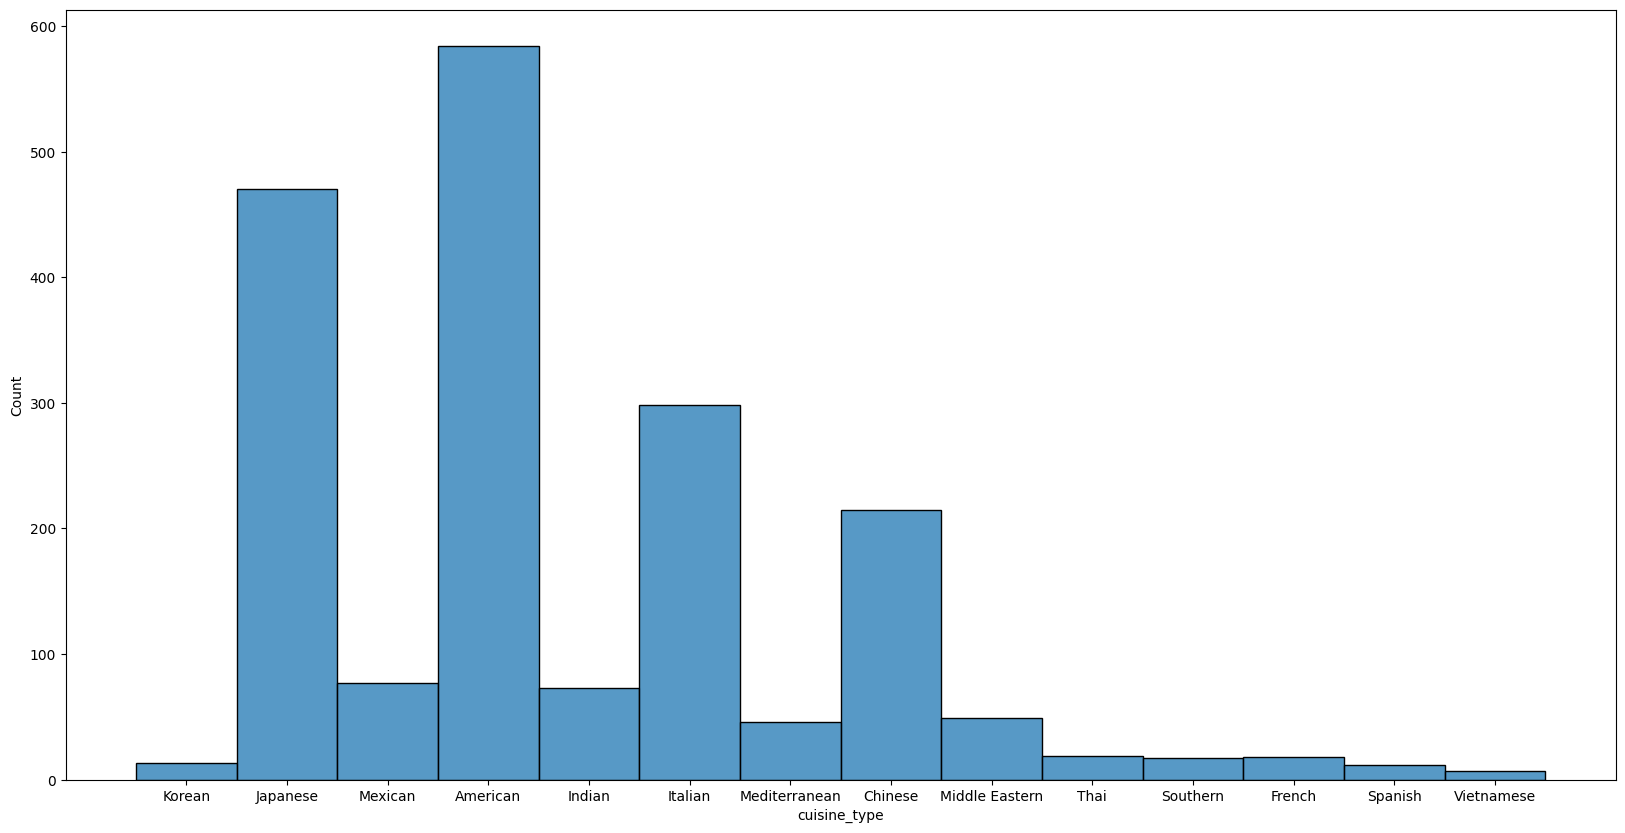

In [13]:
plt.figure(figsize=(20,10))
sns.histplot(data=df,x='cuisine_type')

### Observation : to do

<Axes: xlabel='cost_of_the_order', ylabel='Count'>

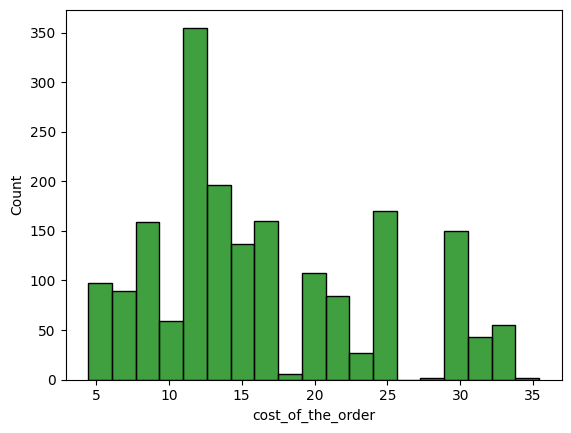

In [14]:
sns.histplot(data=df,x='cost_of_the_order',color='green')

<Axes: xlabel='cost_of_the_order'>

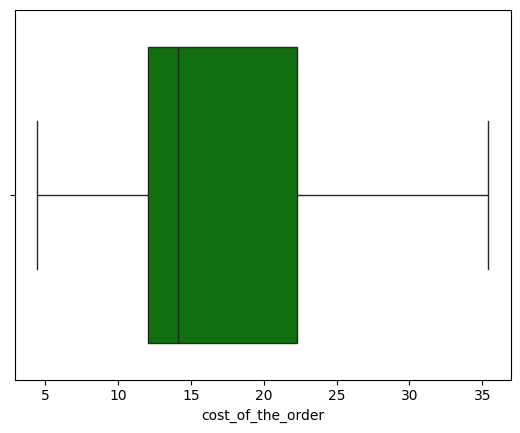

In [15]:
sns.boxplot(data=df,x='cost_of_the_order',color='green')

<Axes: xlabel='day_of_the_week', ylabel='Count'>

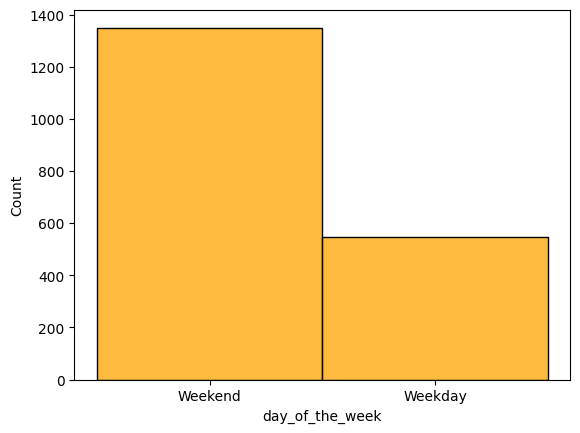

In [16]:
sns.histplot(data=df,x='day_of_the_week',color='orange')

<Axes: xlabel='rating', ylabel='count'>

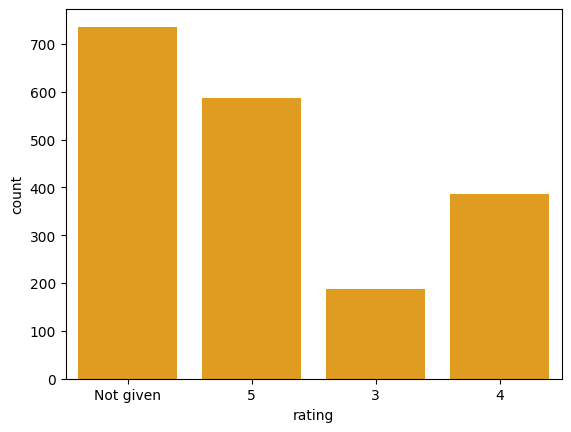

In [17]:
sns.countplot(data=df,x='rating',color='orange')

<Axes: xlabel='rating'>

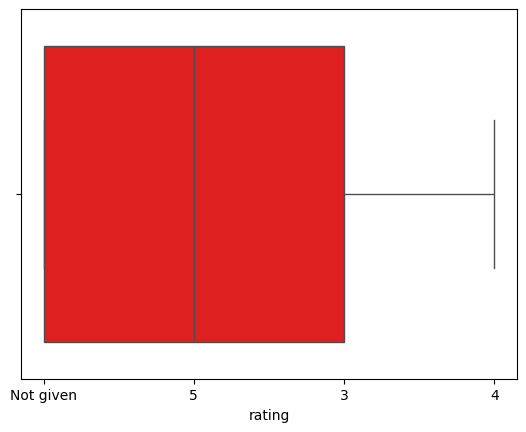

In [18]:
sns.boxplot(data=df,x='rating',color='red')

### Observation: The x axis represents ratings (categories like “Not given”, 3, 4, 5).

The box (in red) represents the middle 50% of the rating distribution.

The thick line inside the box is the median rating (around 5).

The whisker extends towards smaller values (around 3–4), meaning some lower ratings exist but not extreme.


<Axes: xlabel='food_preparation_time', ylabel='count'>

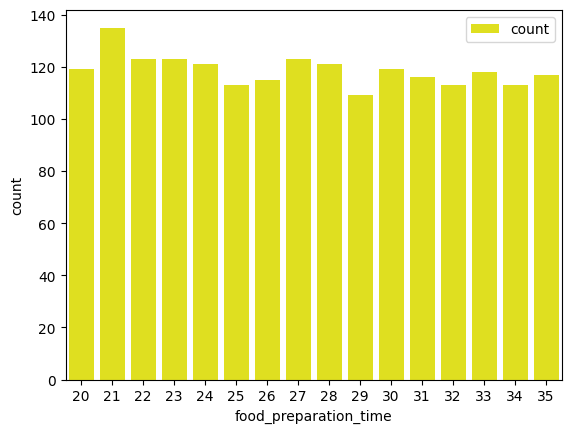

In [19]:
sns.countplot(data=df,x='food_preparation_time',color='yellow',label='count')

<Axes: xlabel='food_preparation_time'>

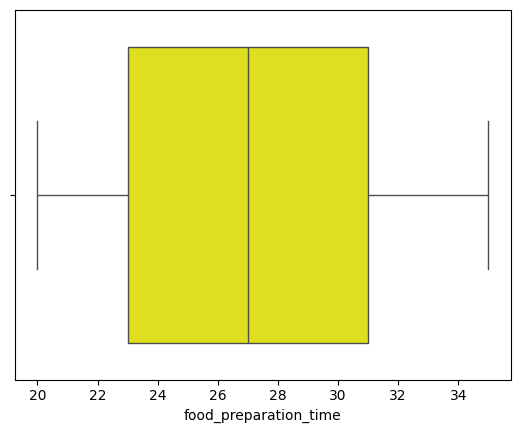

In [20]:
sns.boxplot(data=df,x='food_preparation_time',color='yellow')

<Axes: xlabel='delivery_time', ylabel='count'>

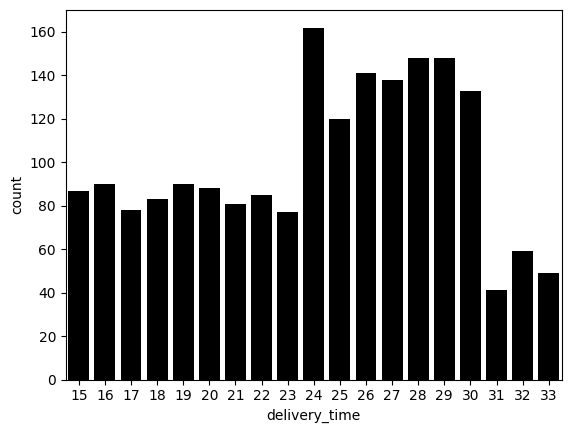

In [21]:
sns.countplot(data=df,x='delivery_time',color='black')

<Axes: xlabel='delivery_time'>

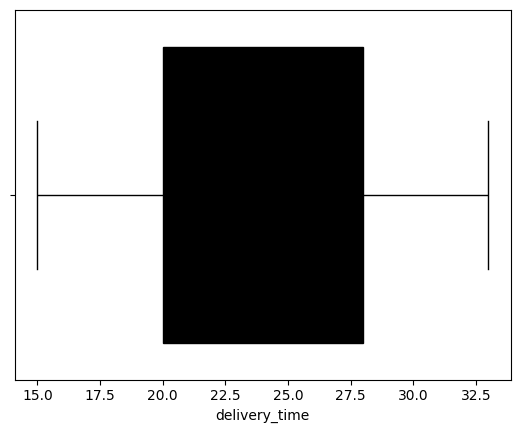

In [22]:
sns.boxplot(data=df,x='delivery_time',color='black')

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [23]:
# Write the code here
df['restaurant_name'].value_counts().head(5)


,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


In [24]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [25]:
# Write the code here
weekend_orders = df[df['day_of_the_week'] == 'Weekend']
most_popular_cuisine_weekend = weekend_orders['cuisine_type'].value_counts().head(1)
print(most_popular_cuisine_weekend)

cuisine_type
American    415
Name: count, dtype: int64


#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [26]:
# Write the code here
df1 = df[df['cost_of_the_order']>20]
count_grt_20 = df1['cost_of_the_order'].count()
percent = count_grt_20 / df.shape[0] * 100
percent

np.float64(29.24130663856691)

#### Observations:
29 % of orders cost more than 20 dollars.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [27]:
# Write the code here
time = df['delivery_time'].mean().round(2)
print(f'Mean order delivery time is {time} minutes')

Mean order delivery time is 24.16 minutes


#### Observations:Mean order delivery time is 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [28]:
# Write the code here

df1 = df['customer_id'].value_counts().head(3)
df1 = df1.rename("Number of Orders Placed")
display(df1)

,Number of Orders Placed
customer_id,
52832,13
47440,10
83287,9


#### Observations:
Number of orders placed by each of the top 3 most frequent customers are as follows:

customer_id	- Number of order placed

52832	         13
47440	         10
83287	          9


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### Cuisine vs Cost of the order

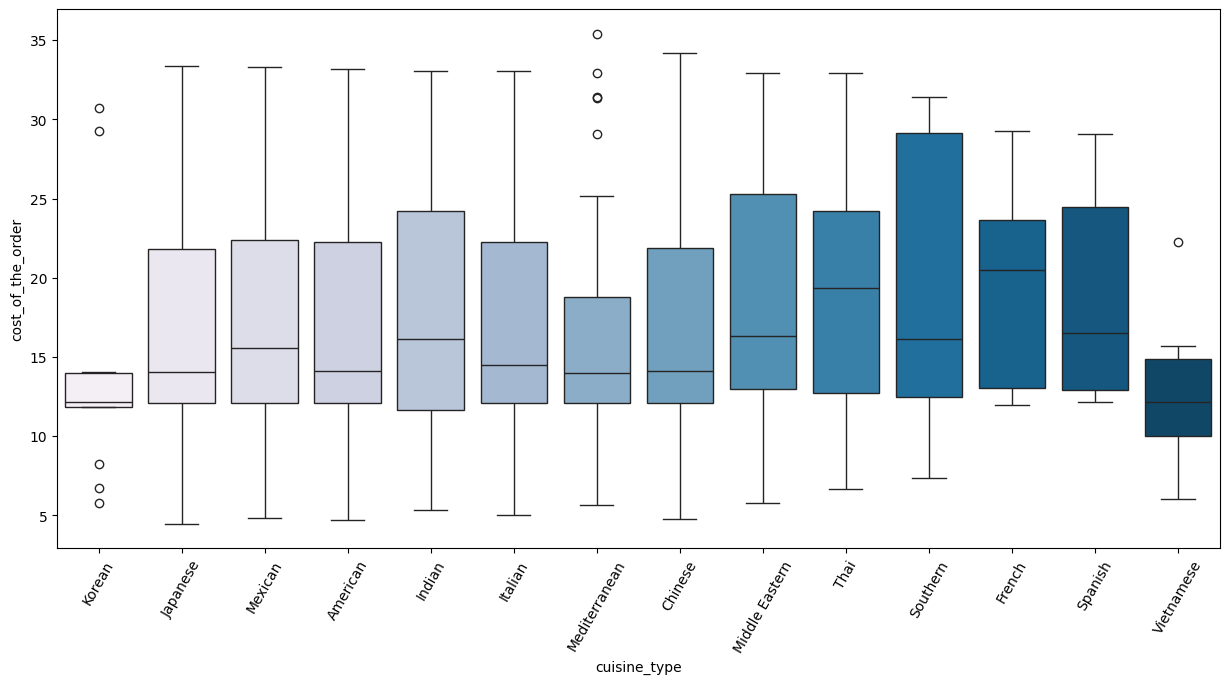

In [29]:
#### Cuisine vs Cost of the order
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu', hue = "cuisine_type")
plt.xticks(rotation = 60)
plt.show()

### Cuisine vs Food Preparation time

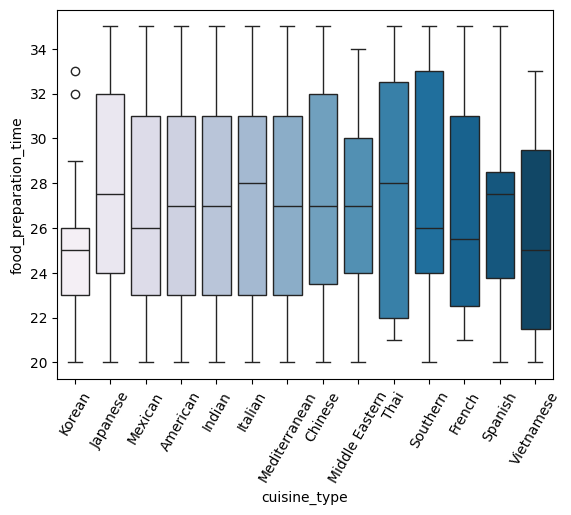

In [30]:
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu', hue = "cuisine_type")
plt.xticks(rotation = 60)
plt.show()

### Day of the Week vs Delivery time

In [31]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


<Axes: xlabel='delivery_time', ylabel='day_of_the_week'>

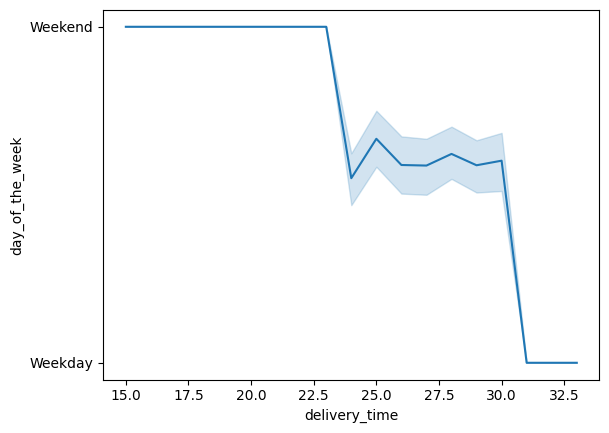

In [32]:
sns.lineplot(y='day_of_the_week',x='delivery_time',data=df)

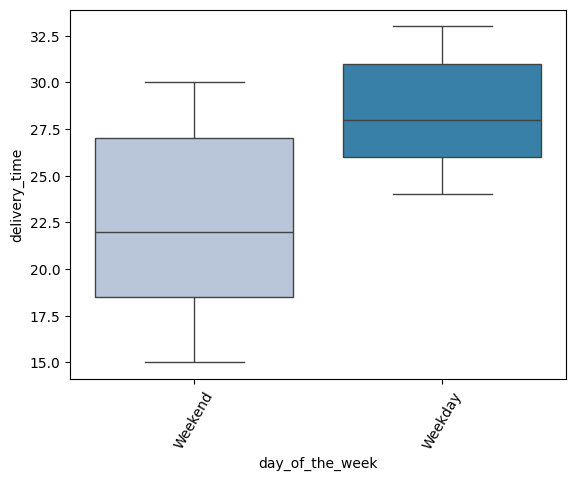

In [33]:
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'PuBu', hue = "day_of_the_week")
plt.xticks(rotation = 60)
plt.show()

<Axes: xlabel='restaurant_name'>

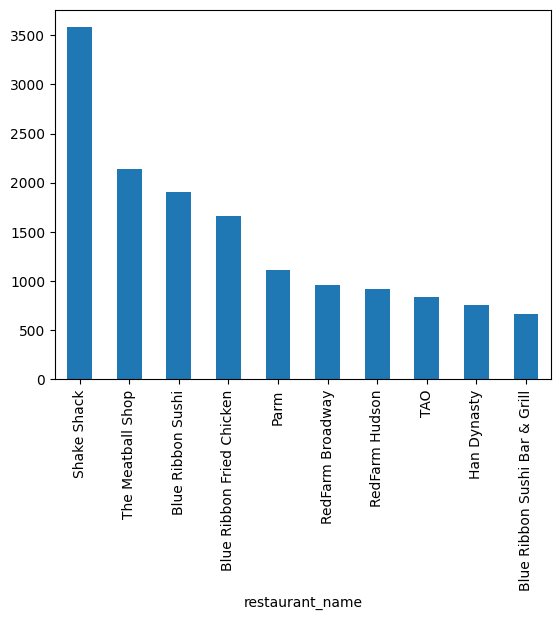

In [34]:
### observations on the revenue generated by the restaurants.


df.groupby('restaurant_name')['cost_of_the_order'].sum().sort_values(ascending=False).head(10).plot(kind='bar')


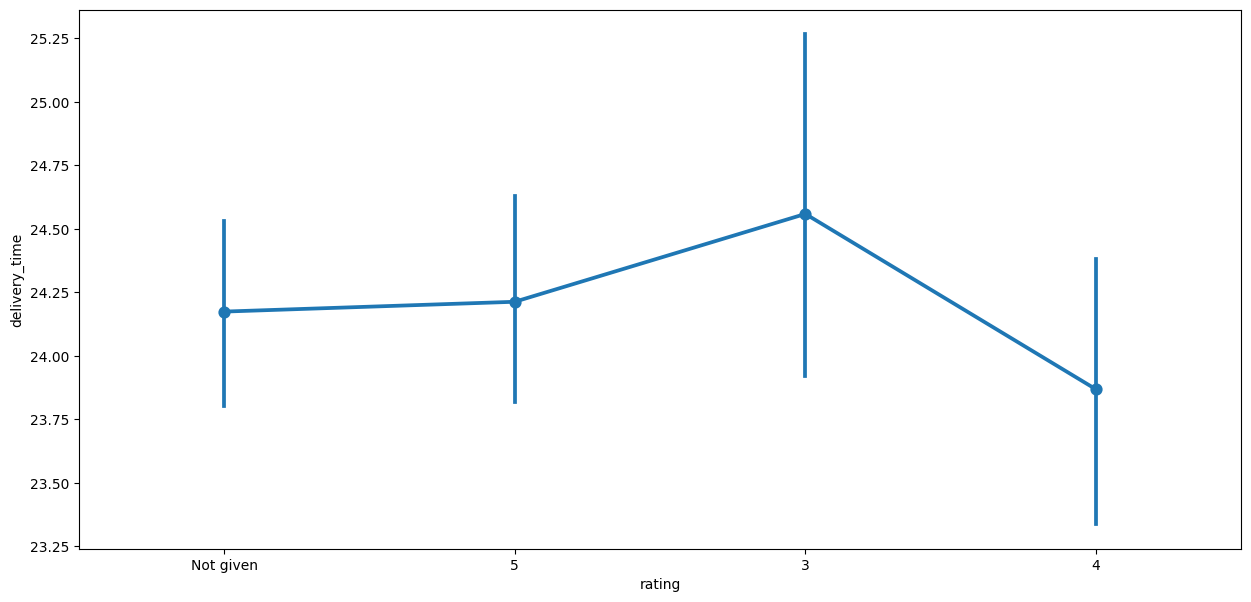

In [35]:
#Rating vs Delivery time
plt.figure(figsize=(15,7))
sns.pointplot(x='rating',y='delivery_time',data=df)
plt.show()

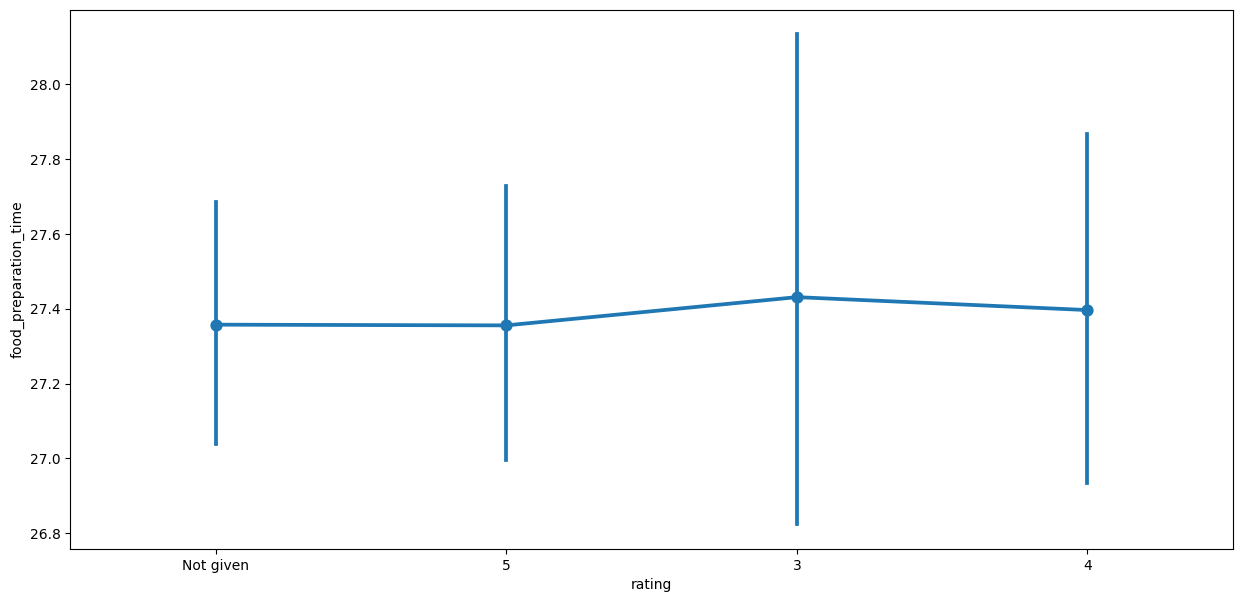

In [36]:
# Rating vs Food preparation time
plt.figure(figsize=(15,7))
sns.pointplot(x='rating',y='food_preparation_time',data=df)
plt.show()

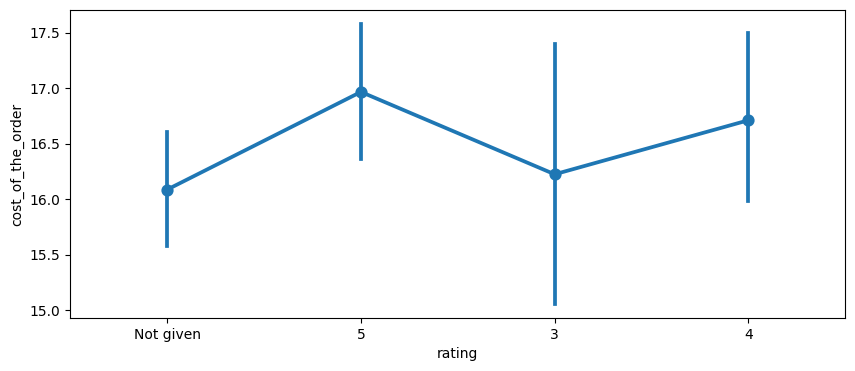

In [37]:
# Rating vs Cost of the order

plt.figure(figsize=(10,4))
sns.pointplot(x='rating',y='cost_of_the_order',data=df)
plt.show()

In [38]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [39]:
df_dummies = pd.get_dummies(df[['cuisine_type','restaurant_name','day_of_the_week']],drop_first=True)
df_dummies.head()

,cuisine_type_Chinese,cuisine_type_French,cuisine_type_Indian,cuisine_type_Italian,cuisine_type_Japanese,cuisine_type_Korean,cuisine_type_Mediterranean,cuisine_type_Mexican,cuisine_type_Middle Eastern,cuisine_type_Southern,...,restaurant_name_Xe May Sandwich Shop,restaurant_name_Xi'an Famous Foods,restaurant_name_Yama 49,restaurant_name_Yama Japanese Restaurant,restaurant_name_Zero Otto Nove,restaurant_name_brgr,restaurant_name_da Umberto,restaurant_name_ilili Restaurant,restaurant_name_indikitch,day_of_the_week_Weekend
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
df_new = pd.concat([df,df_dummies],axis=1)
df_new.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,cuisine_type_Chinese,...,restaurant_name_Xe May Sandwich Shop,restaurant_name_Xi'an Famous Foods,restaurant_name_Yama 49,restaurant_name_Yama Japanese Restaurant,restaurant_name_Zero Otto Nove,restaurant_name_brgr,restaurant_name_da Umberto,restaurant_name_ilili Restaurant,restaurant_name_indikitch,day_of_the_week_Weekend
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,False,...,False,False,False,False,False,False,False,False,False,True
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,False,...,False,False,False,False,False,False,False,False,False,True
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,False,...,False,False,False,False,False,False,False,False,False,False
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,False,...,False,False,False,False,False,False,False,False,False,True
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
df.drop(['cuisine_type','restaurant_name','day_of_the_week','order_id','customer_id'],axis=1,inplace=True)
df.head()

rating_mean = df[df['rating'] != "Not given"]['rating'].astype(float).mean()
df[df['rating']=="Not given"]=rating_mean
#df['rating'] = df['rating'].astype(float)
df.head()


/tmp/ipython-input-3959589163.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.344234079173838' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df[df['rating']=="Not given"]=rating_mean
/tmp/ipython-input-3959589163.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.344234079173838' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df[df['rating']=="Not given"]=rating_mean


,cost_of_the_order,rating,food_preparation_time,delivery_time
0,4.344234,4.344234,4.344234,4.344234
1,4.344234,4.344234,4.344234,4.344234
2,12.230000,5,23.000000,28.000000
3,29.200000,3,25.000000,15.000000
4,11.590000,4,25.000000,24.000000


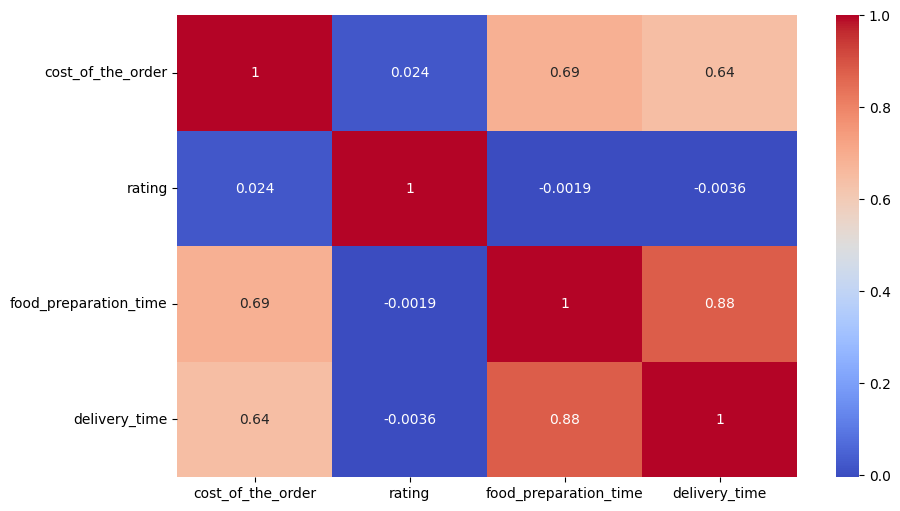

In [42]:
# Correlation among variables
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

## Observations:

delivery_time and food_preparation_time are strongly co-related in +ve direction. that means as the food_preparation time increases, the delivery_time also increases.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [43]:
df = df_original.copy()
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [44]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name'] ## Complete the code to get the restaurant names having rating count more than 50

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4_rating = df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() ## Complete the code to find the mean rating

# filter for average rating greater than 4
df_avg_rating_greater_than_4 = df_mean_4_rating[df_mean_4_rating['rating'] > 4].sort_values(by='rating', ascending=False).reset_index(drop=True)  ## Complete the code to find restaurants with rating > 4

df_avg_rating_greater_than_4

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


In [45]:
# Write the code here

df_from_original = df_original.copy()

# extract 2 columns
df_n1 = df_from_original[['restaurant_name','rating']].copy()
display(df_n1)

# replace 'Not Given' with the mean of given values for rating

mean_val = df_n1[df_n1['rating']!='Not given']['rating'].astype(float).mean()
display(mean_val)


df_n1.loc[df_n1['rating'] == 'Not given', 'rating'] = mean_val
display(df_n1)

# rating count > 50

df_gt = df_n1.groupby('restaurant_name')['rating'].count()
display(df_gt)
df_gt = df_gt[df_gt>50].sort_values(ascending=False)
display(df_gt)


#mean_val = [df_n1['rating']!='Not given']['rating'].mean()
#display(mean_val)

,restaurant_name,rating
0,Hangawi,Not given
1,Blue Ribbon Sushi Izakaya,Not given
2,Cafe Habana,5
3,Blue Ribbon Fried Chicken,3
4,Dirty Bird to Go,4
...,...,...
1893,Chipotle Mexican Grill $1.99 Delivery,5
1894,The Smile,5
1895,Blue Ribbon Sushi,Not given
1896,Jack's Wife Freda,5


np.float64(4.344234079173838)

,restaurant_name,rating
0,Hangawi,4.344234
1,Blue Ribbon Sushi Izakaya,4.344234
2,Cafe Habana,5
3,Blue Ribbon Fried Chicken,3
4,Dirty Bird to Go,4
...,...,...
1893,Chipotle Mexican Grill $1.99 Delivery,5
1894,The Smile,5
1895,Blue Ribbon Sushi,4.344234
1896,Jack's Wife Freda,5


,rating
restaurant_name,
'wichcraft,1
12 Chairs,4
5 Napkin Burger,5
67 Burger,1
Alidoro,1
...,...
Zero Otto Nove,2
brgr,2
da Umberto,3


,rating
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
RedFarm Broadway,59
RedFarm Hudson,55


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [46]:
# Calculate the revenue for each order
def calculate_revenue(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0

df['revenue'] = df['cost_of_the_order'].apply(calculate_revenue)

# Calculate the net revenue
net_revenue = df['revenue'].sum()

print(f"The net revenue generated by the company across all orders is: ${net_revenue:.2f}")

The net revenue generated by the company across all orders is: $6166.30


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [47]:
# Write the code here
#df.head()
df['total_time']=df['delivery_time'] + df['food_preparation_time']

# code below to find the percentage of orders that have more than 60 minutes of total delivery time

orders_gt_60 = df[df['total_time'] > 60].shape[0]

display(orders_gt_60)
percentage_gt_60 = (orders_gt_60 / df.shape[0]) * 100

print(f"Percentage of orders that take more than 60 minutes to be delivered: {percentage_gt_60:.2f}%")

200

Percentage of orders that take more than 60 minutes to be delivered: 10.54%


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [52]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385,49


In [54]:
# Write the code here

delivery_time_weekend= df[df['day_of_the_week']=='Weekend']['delivery_time'].mean()
delivery_time_weekday = df[df['day_of_the_week']=='Weekday']['delivery_time'].mean()

print(f"Mean delivery time during weekends: {delivery_time_weekend:.2f} minutes")
print(f"Mean delivery time during weekdays: {delivery_time_weekday:.2f} minutes")


Mean delivery time during weekends: 22.47 minutes
Mean delivery time during weekdays: 28.34 minutes


#### Observations:

The mean delivery time during weekdays is approximately 28.34 minutes.
The mean delivery time during weekends is approximately 22.47 minutes.
On average, delivery times are shorter on weekends compared to weekdays. This could be due to various factors such as less traffic, more delivery personnel availability, or different order patterns on weekends.



### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  

---